x	y
65 	 2.61999994143844 	 45.6007996205915
66 	 2.65999994054437 	 35.1460299805664
67 	 2.6999999396503 	 17.9337065941941
68 	 2.73999993875623 	 5.81264267423829
69 	 2.77999993786216 	 1.20199844107015
70 	 2.81999993696809 	 0.153147661375951
71 	 2.85999993607402 	 0.01519324867817847
72 	 2.89999993517995 	 0.001477702168667795
73 	 2.93999993428588 	 0.0
74 	 2.97999993339181 	 0.0
75 	 3.01999993249774 	 0.0
76 	 3.05999993160367 	 0.0
77 	 3.0999999307096 	 0.0
78 	 3.13999992981553 	 0.0
79 	 3.17999992892146 	 0.0
The first minimum is at index 73 with x = 2.93999993428588 and y = 0.0.


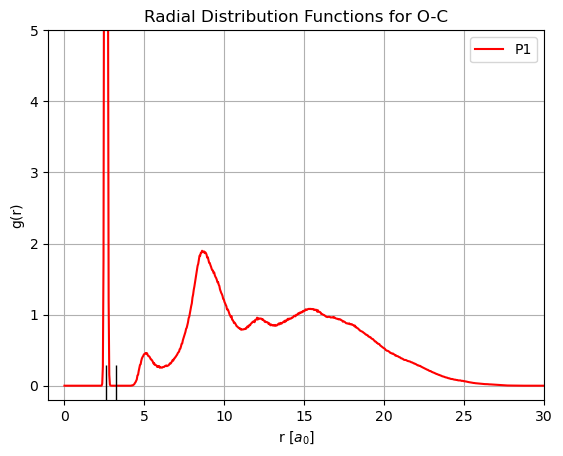

In [15]:
import os
import matplotlib.pyplot as plt

pressure = 1

################ CHANGE ACCORDING TO ATOM TYPE
cell_lengths = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.8879850364710]
volume = cell_lengths[pressure-1] ** 3
no_of_atoms = 64 #192 for O, 128 for Na, 64 for C
rho = no_of_atoms / volume

#pairs = ['111','121', '131', '221', '231','331']
pair = '121'
######################

parent_directory = 'D:/MSc/summer_project/'
directory = 'D:/MSc/summer_project/p' + str(pressure)
file_path = os.path.join(directory, 'rdf.out' + pair + '.txt')
with open(file_path, 'r') as file:
    data = file.readlines()
    x_values = []
    y_values = []
    for line in data:
        x, y = map(float, line.split())
        x_values.append(x)
        y_values.append(y)
        
label = 'P' + str(pressure)
colour = 'red'
plt.plot(x_values, y_values, label = label, color = colour)

plt.legend()
plt.xlim(-1,30)
plt.ylim(-0.2,5)
plt.xlabel('r [$a_0$]')
plt.ylabel('g(r)')
plt.grid(True)

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]
plt.title('Radial Distribution Functions for ' + title_label)

#####

def pick_range(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 30)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 30)
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        lowest_value = min(y_values)
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == lowest_value:
                print('The first minimum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                break


lower_index = 65
upper_index = 80
pick_range(lower_index, upper_index, x_values, y_values)

In [16]:
from scipy import integrate
import math

index_at_min = 73

def calculate_cn(x_values, y_values, index_at_min, rho):
    to_be_integrated = [y * (x**2) for y, x in zip(y_values[:index_at_min], x_values[:index_at_min])]
    integral = integrate.trapezoid(to_be_integrated, x_values[:index_at_min])
    coordination_number = 4 * math.pi * rho * integral
    print('The coordination number is ' + str(coordination_number))
    return coordination_number

calculate_cn(x_values, y_values, index_at_min, rho)


The coordination number is 0.9999753224423222


0.9999753224423222

In [26]:
#cell_lengths = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.88798503647
print(colours)

['#ffba08', '#f48c06', '#e85d04', '#dc2f02', '#9d0208', '#370617']
